<a href="https://colab.research.google.com/github/mgarbanzo/UCR_NOAA_2020/blob/main/Generando_producto_con_mapa_dinamico_de_GLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

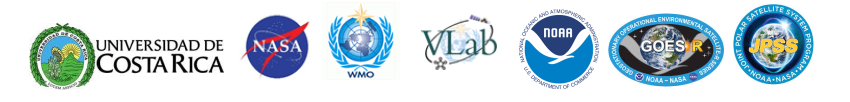

# Práctica de Python en la nube para generar el producto del GLM de GOES 16

## Entrenamiento Virtual en Aplicaciones de Satélites para la RA-IV de la OMM



# Recordatorio:

Existen casillas de Texto y de Código.

Puede agregar casillas utilizando los botones de arriba a la izquierda donde dice 

> \+ Código

y 

> \+ Texto

luego para ejecutar el código o dejar finalizar la edición de texto debe presionar

> Shift + Enter

sobre cada casilla individual.

---

Por cierto, el tipo de texto que se utiliza aquí es llamado **Markdown** y puede aprender más acerca de como utilizarlo [aquí en Inglés](https://www.markdownguide.org/basic-syntax/) o [aquí en Español](https://markdown.es/sintaxis-markdown/).





# Primero debemos obtener la información para visualizar.

El evento ocurrió el 3 de Junio del 2018 a las 22 UCT.

Los enlaces mostrados se obtuvieron de [este enlace](http://home.chpc.utah.edu/~u0553130/Brian_Blaylock/cgi-bin/goes16_download.cgi?source=aws&satellite=noaa-goes16&domain=F&product=ABI-L2-CMIP&date=2019-07-17&hour=12).

Note que se comienza con la instrucción !wget donde:

> el símbolo **!** indica que no es un comando de Python sino de GNU/Linux 

y 

> **wget** es un programa para descargar información de sitios web.

Descargamos los datos ejecutando las siguientes dos casillas de código:

In [34]:
!wget https://noaa-goes16.s3.amazonaws.com/GLM-L2-LCFA/2020/295/18/OR_GLM-L2-LCFA_G16_s20202951830000_e20202951830200_c20202951830224.nc


--2020-10-21 19:26:36--  https://noaa-goes16.s3.amazonaws.com/GLM-L2-LCFA/2020/295/18/OR_GLM-L2-LCFA_G16_s20202951830000_e20202951830200_c20202951830224.nc
Resolving noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)... 52.216.143.236
Connecting to noaa-goes16.s3.amazonaws.com (noaa-goes16.s3.amazonaws.com)|52.216.143.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462891 (452K) [binary/octet-stream]
Saving to: ‘OR_GLM-L2-LCFA_G16_s20202951830000_e20202951830200_c20202951830224.nc.2’

OR_GLM-L2-LCFA_G16_ 100%[===================>] 452.04K  --.-KB/s    in 0.06s   

2020-10-21 19:26:37 (7.93 MB/s) - ‘OR_GLM-L2-LCFA_G16_s20202951830000_e20202951830200_c20202951830224.nc.2’ saved [462891/462891]



# Se requieren algunas librerías para poder leer datos satelitales

Una de las librerías más usadas para leer datos satelitales es **NetCDF4** que se instala con el siguiente comando:

In [22]:
!pip install netCDF4

In [23]:
!pip install folium

Una vez instalada, se puede incorporar en Python junto a otras librería útiles para visualización y manipulación de arreglos de números:

In [24]:
import pylab as plt
from netCDF4 import Dataset                
import matplotlib.pyplot as plt           
#import cartopy, cartopy.crs as ccrs      
import numpy as np                      
from datetime import datetime
import matplotlib as mpl
import folium
from folium import plugins, FeatureGroup

# Asignar el metadato a los datos es simple y rápido

En la casilla siguiente se utiliza el comando Dataset de la librería NetCDF4 para cargar los metadatos a las variables.

El GLM genera información de Eventos, Grupos y Flases detectados en un lapso de 20 segundos. En los comandos siguientes se leen todos los datos de posición (lat y lon) así como energía. Para los grupos y flases se puede obtener también una estimación del área.



In [41]:
# Se abre la imagen del GOES-16 para obtener información
GLM = Dataset("/content/OR_GLM-L2-LCFA_G16_s20202951830000_e20202951830200_c20202951830224.nc.2", 'r')

event_energy = GLM.variables['event_energy'][:]
event_lat = GLM.variables['event_lat'][:]
event_lon = GLM.variables['event_lon'][:]

group_energy = GLM.variables['group_energy'][:]
group_area = GLM.variables['group_area'][:]
group_lat = GLM.variables['group_lat'][:]
group_lon = GLM.variables['group_lon'][:]

flash_energy = GLM.variables['flash_energy'][:]
flash_area = GLM.variables['flash_area'][:]
flash_lat = GLM.variables['flash_lat'][:]
flash_lon = GLM.variables['flash_lon'][:]


# Comandos opcionales para limitar el área

En el siguiente comando se puede limitar el área a utilizar para la graficación de los datos. Esto es útil principalmente debido al tamaño del archivo final.

Si quiere observar TODA la información detectada por el GLM en el globo **debe ignorar los siguientes comandos y no ejecutarlos**.


In [37]:
# Modifique estos valores si le interesa limitar la región a su país.
latmin = 0.0
latmax = 30
lonmin = -70
lonmax = -100

ILat = np.multiply(event_lat > latmin, event_lat < latmax)
event_lat = event_lat[ILat]
event_lon = event_lon[ILat]
event_energy = event_energy[ILat]
ILon = np.multiply(event_lon < lonmin, event_lon > lonmax)
event_lat = event_lat[ILon]
event_lon = event_lon[ILon]
event_energy = event_energy[ILon]

ILat = np.multiply(group_lat > latmin, group_lat < latmax)
group_energy = group_energy[ILat]
group_area = group_area[ILat]
group_lat = group_lat[ILat]
group_lon = group_lon[ILat]
ILon = np.multiply(group_lon < lonmin, group_lon > lonmax)
group_energy = group_energy[ILon]
group_area = group_area[ILon]
group_lat = group_lat[ILon]
group_lon = group_lon[ILon]

ILat = np.multiply(flash_lat > latmin, flash_lat < latmax)
flash_energy = flash_energy[ILat]
flash_area = flash_area[ILat]
flash_lat = flash_lat[ILat]
flash_lon = flash_lon[ILat]
ILon = np.multiply(flash_lon < lonmin, flash_lon > lonmax)
flash_energy = flash_energy[ILon]
flash_area = flash_area[ILon]
flash_lat = flash_lat[ILon]
flash_lon = flash_lon[ILon]


# Sección de graficación de datos y generación de producto

Se utiliza la librería **folium** para generar el mapa llamado mapaFinal.

Luego existen tres variables:

* incluirEventos
* incluirGrupos
* incluirFlashes

que pueden tomar de valores True o False. El valor de **True** genera que se incluyan esos datos en el producto final, el valor de **False** causa que esos datos sean excluidos del mapa final.

Al final se puede modificar el nombre del archivo de salida reemplazando **NombreFinaldelProducto** con un nombre específico.



In [43]:
mapaFinal = folium.Map(
    location=[10, -84],
    tiles='cartodbpositron',
    zoom_start=8,
    control_scale=True
)

incluirEventos = True
incluirGrupos = True
incluirFlashes = True

if incluirEventos:
  for i in range(len(event_energy)):
      folium.CircleMarker(
          location=[event_lat[i], event_lon[i]],
          radius=5,
          popup='Rayo Detectado',
          color='#FFD700',
          fill=True,
          fill_color='#FFD700'
      ).add_to(mapaFinal)

if incluirGrupos:
  for i in range(len(group_energy)):
      folium.CircleMarker(
          location=[group_lat[i], group_lon[i]],
          #radius=np.int(group_area[i])/500,
          radius=8,
          popup='Zona de alta actividad',
          color='#FF4500',
          fill=True,
          fill_color='#FF4500'
      ).add_to(mapaFinal)

if incluirFlashes:
  for i in range(len(flash_energy)):
      folium.Marker(
      location=[flash_lat[i], flash_lon[i]],
      popup="Energía: "+str(flash_energy[i])+" J",
      icon=folium.Icon(color='red', icon='cloud')
      ).add_to(mapaFinal)

m.save('NombreFinaldelProducto.html')


# Más allá de los datos básicos del GLM

A continuación se incluyen los histogramas de los datos de Energía y Área para los productos del GLM.

(array([537.,  30.,  10.,   9.,   3.,   1.,   1.,   2.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([3.2851379e-15, 2.5808411e-13, 5.1288308e-13, 7.6768209e-13,
        1.0224810e-12, 1.2772800e-12, 1.5320790e-12, 1.7868780e-12,
        2.0416769e-12, 2.2964759e-12, 2.5512749e-12, 2.8060739e-12,
        3.0608730e-12, 3.3156720e-12, 3.5704710e-12, 3.8252700e-12,
        4.0800687e-12, 4.3348680e-12, 4.5896668e-12, 4.8444660e-12,
        5.0992648e-12], dtype=float32),
 <a list of 20 Patch objects>)

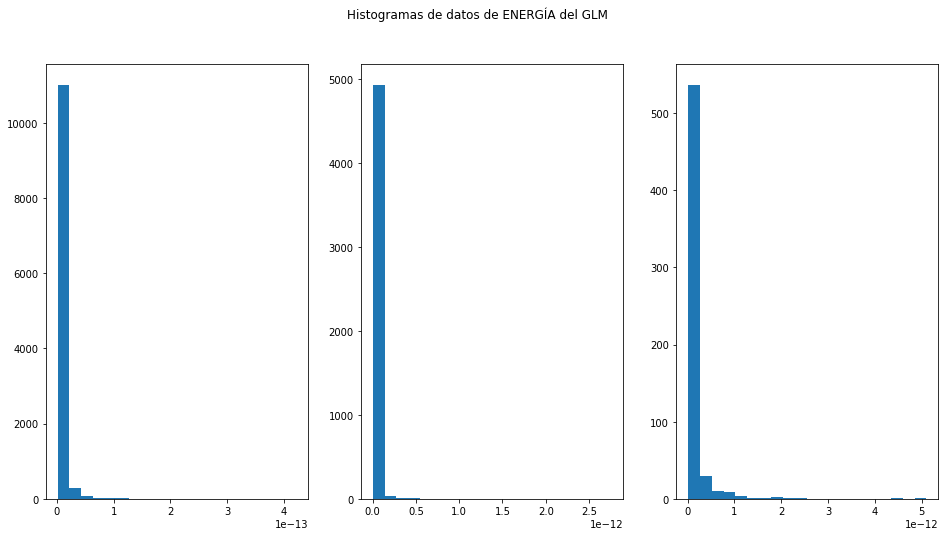

In [59]:
fig, [ax0, ax1, ax2] = plt.subplots(1,3,figsize=(16,8))
fig.suptitle('Histogramas de datos de ENERGÍA del GLM')
ax0.hist(event_energy,bins=20)
ax1.hist(group_energy,bins=20)
ax2.hist(flash_energy,bins=20)

(array([275., 168.,  76.,  31.,   9.,   7.,  11.,   2.,   4.,   4.,   0.,
          4.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([6.4703188e+07, 2.0545550e+08, 3.4620784e+08, 4.8696016e+08,
        6.2771245e+08, 7.6846477e+08, 9.0921715e+08, 1.0499695e+09,
        1.1907218e+09, 1.3314740e+09, 1.4722264e+09, 1.6129787e+09,
        1.7537311e+09, 1.8944833e+09, 2.0352357e+09, 2.1759880e+09,
        2.3167404e+09, 2.4574927e+09, 2.5982449e+09, 2.7389972e+09,
        2.8797496e+09], dtype=float32),
 <a list of 20 Patch objects>)

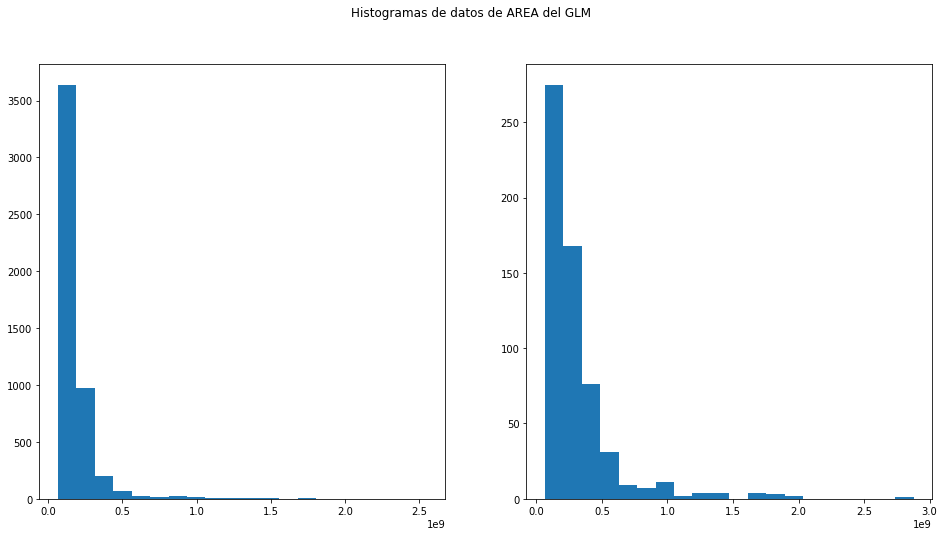

In [63]:
fig, [ax0, ax1] = plt.subplots(1,2,figsize=(16,8))
fig.suptitle('Histogramas de datos de AREA del GLM')
ax0.hist(group_area,bins=20)
ax1.hist(flash_area,bins=20)